# Bootstrap

## Another Example: Mean Maternal Age

In [3]:
# This time we have a sample, but no population data!
births = Table.read_table('data/baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


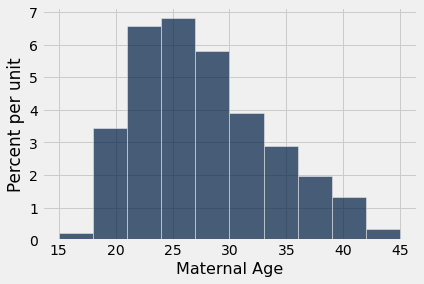

In [4]:
births.hist('Maternal Age')

In [5]:
mean_age = np.mean(births.column('Maternal Age'))
mean_age

27.228279386712096

In [6]:
def one_bootstrap_mean():
    return np.mean(births.sample().column('Maternal Age'))

In [7]:
bootstrap_means = make_array()

for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

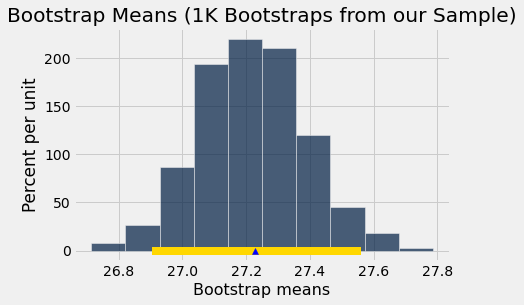

In [8]:
Table().with_column('Bootstrap means', bootstrap_means).hist()

plots.plot([left,right], [0,0], color="gold", lw=8, zorder=1);
plots.scatter(mean_age,-1e-3,color="blue", marker="^", zorder=2);
plots.title('Bootstrap Means (1K Bootstraps from our Sample)');

In [9]:
left, right

(26.903747870528107, 27.55962521294719)

 ## Maternal Smoker Proportion

In [20]:
proportion_smoker = np.mean(births.column('Maternal Smoker') == True)
proportion_smoker

0.3909710391822828

In [21]:
def one_bootstrap_proportion():
    return np.mean(births.sample().column('Maternal Smoker') == True)

In [23]:
one_bootstrap_proportion()

0.38160136286201024

In [24]:
bootstrap_proportions = make_array()

for i in np.arange(1000):
    new_proportion = one_bootstrap_proportion()
    bootstrap_proportions = np.append(bootstrap_proportions, new_proportion)
    
left = percentile(2.5, bootstrap_proportions)
right = percentile(97.5, bootstrap_proportions)

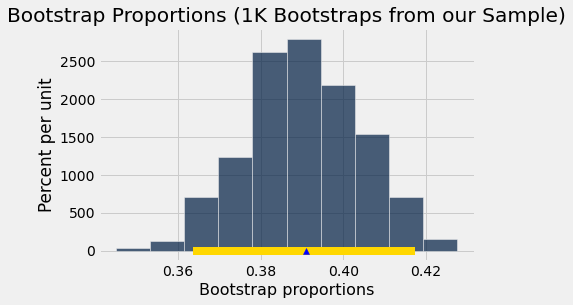

In [25]:
Table().with_column('Bootstrap proportions', bootstrap_proportions).hist()

plots.plot([left,right], [0,0], color="gold", lw=8, zorder=1);
plots.scatter(proportion_smoker,-1e-3,color="blue", marker="^", zorder=2);
plots.title('Bootstrap Proportions (1K Bootstraps from our Sample)');

In [26]:
left, right

(0.3637137989778535, 0.41737649063032367)

## Using CI's for Testing

In [27]:
def bootstrap_mean(original_sample, label, replications):
    
    just_one_column = original_sample.select(label)
    means = make_array()
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_mean = np.mean(bootstrap_sample.column(0))
        means = np.append(means, resampled_mean)
        
    return means

In [28]:
hodgkins = Table.read_table('data/hodgkins.csv')
hodgkins.show(5)

height,rad,chemo,base,month15
164,679,180,160.57,87.77
168,311,180,98.24,67.62
173,388,239,129.04,133.33
157,370,168,85.41,81.28
160,468,151,67.94,79.26


In [29]:
hodgkins = hodgkins.with_column(
    'drop', hodgkins.column('base') - hodgkins.column('month15')
)
hodgkins

height,rad,chemo,base,month15,drop
164,679,180,160.57,87.77,72.8
168,311,180,98.24,67.62,30.62
173,388,239,129.04,133.33,-4.29
157,370,168,85.41,81.28,4.13
160,468,151,67.94,79.26,-11.32
170,341,96,150.51,80.97,69.54
163,453,134,129.88,69.24,60.64
175,529,264,87.45,56.48,30.97
185,392,240,149.84,106.99,42.85
178,479,216,92.24,73.43,18.81


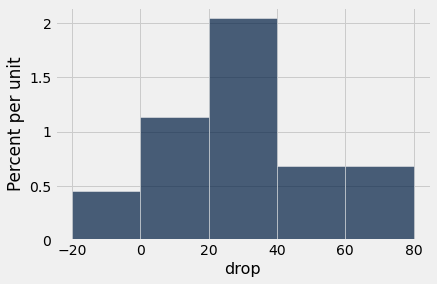

In [31]:
hodgkins.select('drop').hist(bins=np.arange(-20, 81, 20))

In [32]:
np.mean(hodgkins.column('drop'))

28.615909090909096

In [33]:
bstrap_means = bootstrap_mean(hodgkins, 'drop', 10000)

left = percentile(0.5, bstrap_means)
right = percentile(99.5, bstrap_means)

make_array(left, right)

array([17.05090909, 40.60727273])

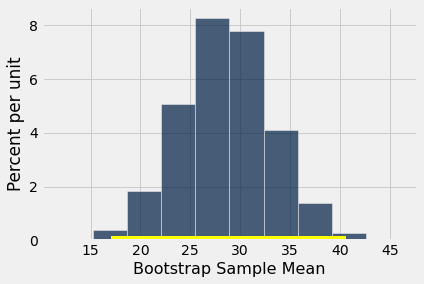

In [34]:
resampled_means = Table().with_column(
    'Bootstrap Sample Mean', bstrap_means
)
resampled_means.hist()
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);